<a href="https://colab.research.google.com/github/exalteded/DSPS_ejones/blob/master/HW2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Written By Elliott Jones eljones@udel.edu UDEL DSPS(Data science for Physicists 2019)

In [2]:
from __future__ import print_function
__author__= 'elj'

import pylab as pl
# this package sets up pretty plots
from scipy.optimize import curve_fit, minimize
    
%pylab inline
import seaborn
seaborn.set_style("darkgrid")

Populating the interactive namespace from numpy and matplotlib


In [0]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
#set distribution notation
distributions = ['chisq']

In [0]:
#set mean
mymean = 100

In [0]:
#set degrees of freedom
df = mymean

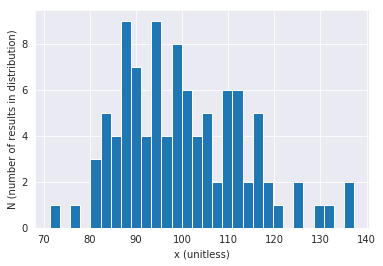

In [25]:
#example distribution
import numpy as np
np.random.seed(456)
md = {}
# md is an empty disctionary; 
# if you are not familiar with python dictionaries see https://www.pythonforbeginners.com/dictionary/how-to-use-dictionaries-in-python
md['chisq'] = np.random.chisquare(mymean, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N (number of results in distribution)')
pl.xlabel('x (unitless)');

In [8]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 100.09, standard deviation: 13.24


In [9]:
#example creates random integers that will be the size of chisquare distributions
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print ("shape of the 'size' list that contains the size of each distribution", mysize.shape)

shape of the 'size' list that contains the size of each distribution (99,)


Text(0, 0.5, 'size of the array')

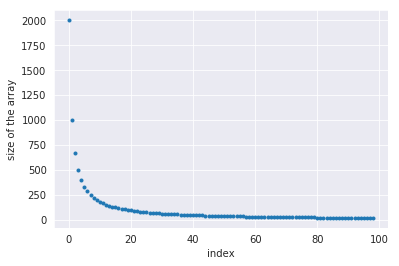

In [11]:
#example plot shows the array of my size
pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the array")

Text(1259.3999999999999, 100, 'expected mean')

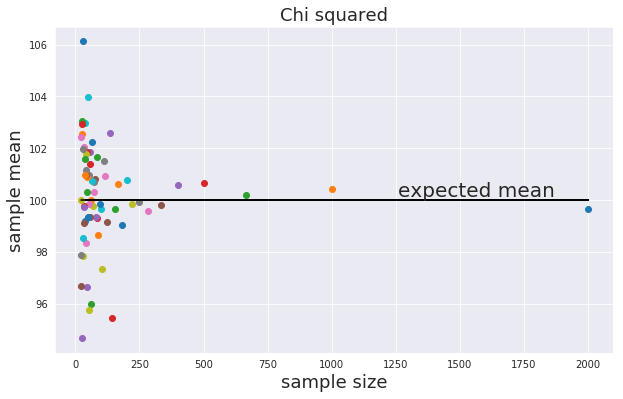

In [12]:
#example overwrite
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

i see here that as the sample size approaches the sample mean asymptotes from both sides towards the expected mean as should be the case with the law of large numbers.

Text(0, 0.5, 'N')

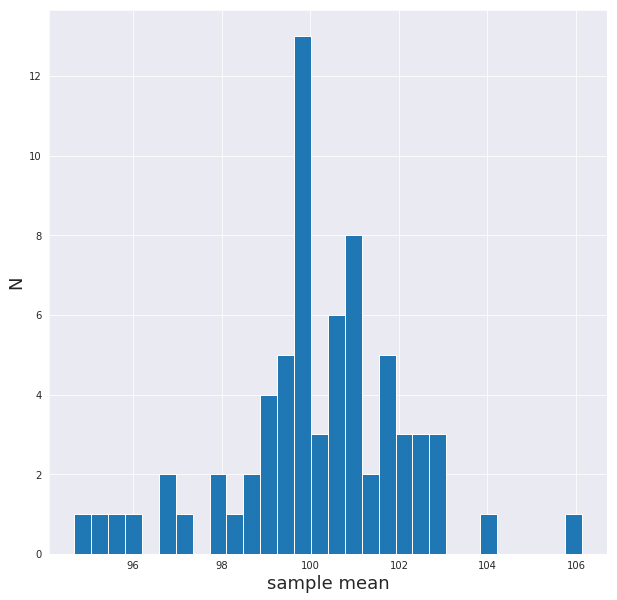

In [13]:
#example histogram
allmeans = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

#allright let's do a normal gaussian

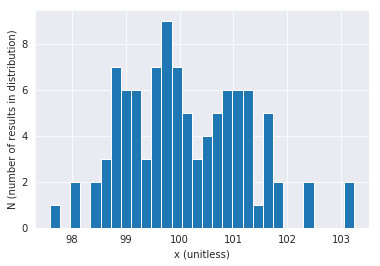

In [36]:
distributions1 = ['norm']
np.random.seed(300)
md1 = {}
# md1 is an empty disctionary; 
#mean for normal gaussian is just u so we keep it as 100 for now
md1['norm'] = np.random.normal(loc = mymean,scale = 1.0,  size=100)
# md1 now is a dictionary with one object: an array by the key 'gaus'
pl.hist(md1['norm'], bins = 30)
pl.ylabel('N (number of results in distribution)')
pl.xlabel('x (unitless)');

In [33]:
print ("gaussian mean: %.2f, standard deviation: %.2f"%(md1['norm'].mean(), md1['norm'].std()))

gaussian mean: 100.14, standard deviation: 0.92


shape of the 'size' list that contains the size of each distribution (99,)


Text(0, 0.5, 'size of the array')

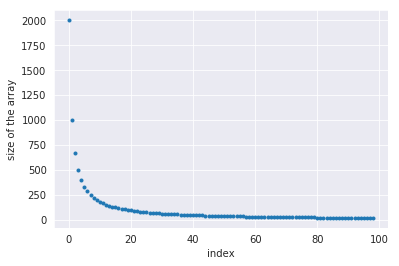

In [37]:
mysize1 = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize1 = 1000 / (np.array(range(1, 100) + [10]))
# mysize1 = (np.random.rand(100) * 1000).astype(int)
print ("shape of the 'size' list that contains the size of each distribution", mysize1.shape)
#example plot shows the array of my size
pl.plot(mysize1, '.')
pl.xlabel("index")
pl.ylabel("size of the array")

Text(0, 0.5, 'N')

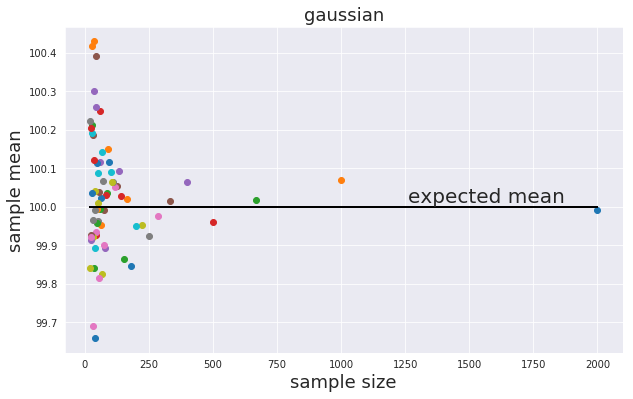

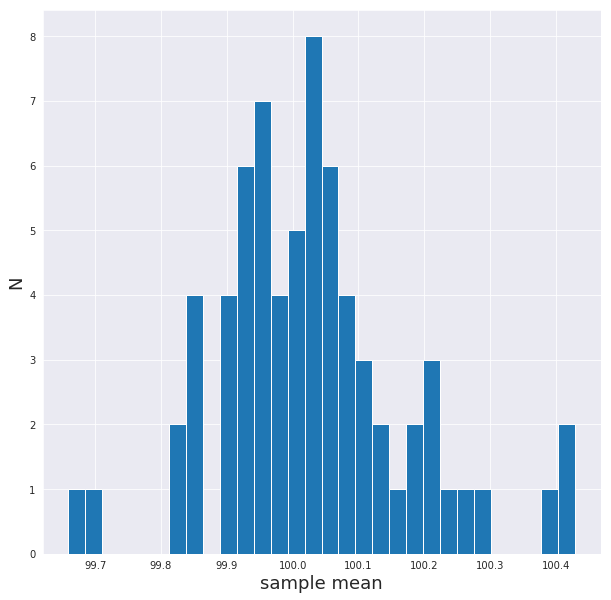

In [56]:


md1['norm'] = {} 


for n in mysize1:
    md1['norm'][n] = np.random.normal(loc= mymean, scale=1.0, size = n)
    
# save the means for plotting later    

md1['norm']['means'] = {}
axnormal_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md1['norm']:
    if not type(nn) == str:
        md1['norm']['means'][nn] = md1['norm'][nn].mean()
        #and plot it
        axnormal_mu_n.plot(nn, md1['norm']['means'][nn], 'o')
        axnormal_mu_n.set_xlabel('sample size', fontsize=18)
        axnormal_mu_n.set_ylabel('sample mean', fontsize=18)
        axnormal_mu_n.set_title('gaussian', fontsize=18)
        axnormal_mu_n.plot([min(mysize1), max(mysize1)], [df, df], 'k')
axnormal_mu_n.text(axnormal_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

allmeans = list(md1['norm']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

Poission this time

poission mean: 1.05, standard deviation: 1.05


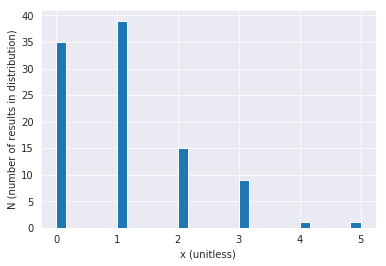

In [42]:
distributions2 = ['pois']
np.random.seed(200)
md2 = {}
# md1 is an empty disctionary; 
#so this time according to wikipedia the mean is equal to the interval so let's set an interval of 1 and keep a size of 100
md2['pois'] = np.random.poisson(lam=1.0, size=100)
# md1 now is a dictionary with one object: an array by the key 'gaus'
pl.hist(md2['pois'], bins = 30)
pl.ylabel('N (number of results in distribution)')
pl.xlabel('x (unitless)');
print ("poission mean: %.2f, standard deviation: %.2f"%(md2['pois'].mean(), md2['pois'].std()))

shape of the 'size' list that contains the size of each distribution (99,)


Text(0, 0.5, 'size of the array')

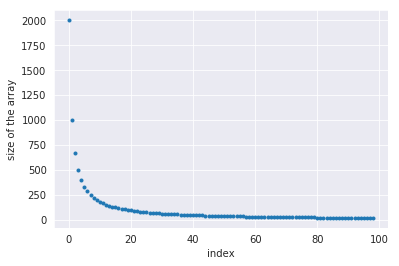

In [50]:
#new array i feel like i could probably use the same one it looks the same every time but better safe than sorry
mysize2 = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize2 = 1000 / (np.array(range(1, 100) + [10]))
# mysize2 = (np.random.rand(100) * 1000).astype(int)
print ("shape of the 'size' list that contains the size of each distribution", mysize2.shape)
#example plot shows the array of my size
pl.plot(mysize2, '.')
pl.xlabel("index")
pl.ylabel("size of the array")

Text(0, 0.5, 'N')

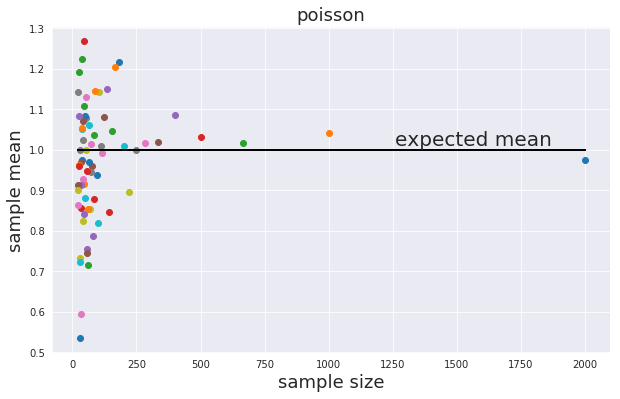

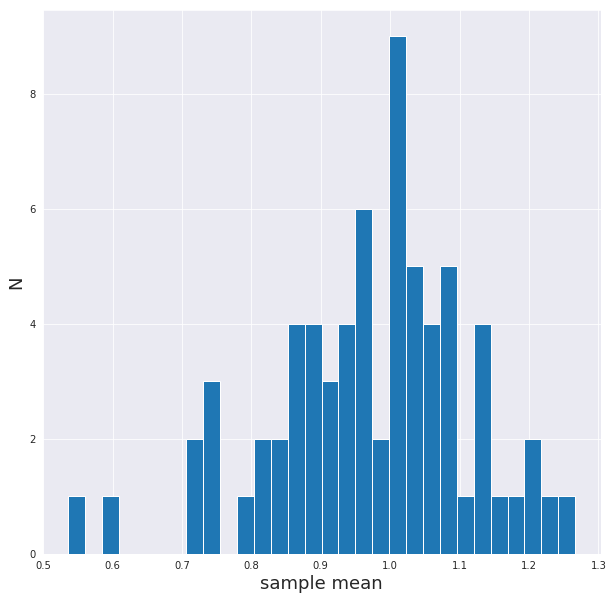

In [59]:
md2['pois'] = {} 


for n in mysize2:
    md2['pois'][n] = np.random.poisson(lam = 1.0, size = n)
    
# save the means for plotting later    

md2['pois']['means'] = {}
axpors_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md2['pois']:
    if not type(nn) == str:
        md2['pois']['means'][nn] = md2['pois'][nn].mean()
        #and plot it
        axpors_mu_n.plot(nn, md2['pois']['means'][nn], 'o')
        axpors_mu_n.set_xlabel('sample size', fontsize=18)
        axpors_mu_n.set_ylabel('sample mean', fontsize=18)
        axpors_mu_n.set_title('poisson', fontsize=18)
        axpors_mu_n.plot([min(mysize2), max(mysize2)], [1, 1], 'k')
axpors_mu_n.text(axpors_mu_n.get_xlim()[1] * .6, 1, "expected mean", 
                  va="bottom", fontsize=20)

allmeans = list(md2['pois']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

this looks right because with an interval of 1 the means should all be around 1 

Binomial distribution


binomial mean: 2.68, standard deviation: 1.23


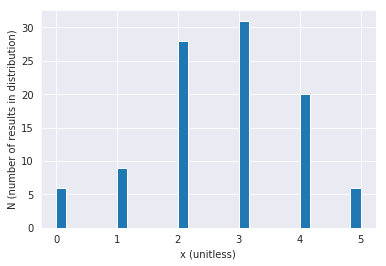

In [49]:
distributions3 = ['binomial']
np.random.seed(200)
md3 = {}
# md1 is an empty disctionary; 
#so this time according to wikipedia the mean is equal to n*p let's set them n to 5 and p to .5 so our mean should come out somewhere close to 2.5
md3['binomial'] = np.random.binomial(n = 5, p = .5, size=100)
# md1 now is a dictionary with one object: an array by the key 'gaus'
pl.hist(md3['binomial'], bins = 30)
pl.ylabel('N (number of results in distribution)')
pl.xlabel('x (unitless)');
print ("binomial mean: %.2f, standard deviation: %.2f"%(md3['binomial'].mean(), md3['binomial'].std()))

shape of the 'size' list that contains the size of each distribution (99,)


Text(0, 0.5, 'size of the array')

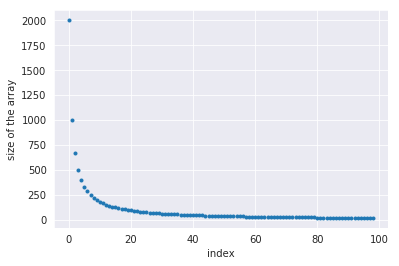

In [52]:
#new array i feel like i could probably use the same one it looks the same every time but better safe than sorry
mysize3 = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize3 = 1000 / (np.array(range(1, 100) + [10]))
# mysize3 = (np.random.rand(100) * 1000).astype(int)
print ("shape of the 'size' list that contains the size of each distribution", mysize3.shape)
#example plot shows the array of my size
pl.plot(mysize3, '.')
pl.xlabel("index")
pl.ylabel("size of the array")

Text(0, 0.5, 'N')

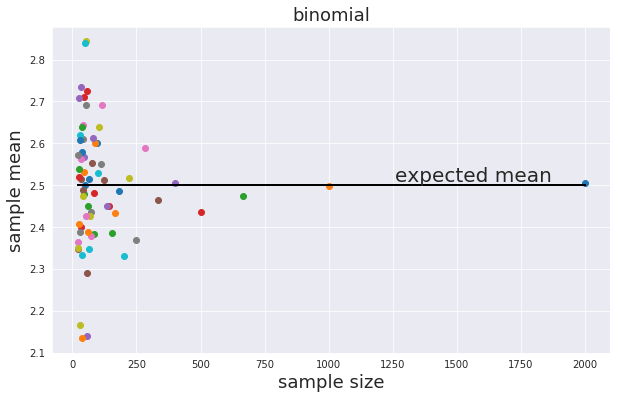

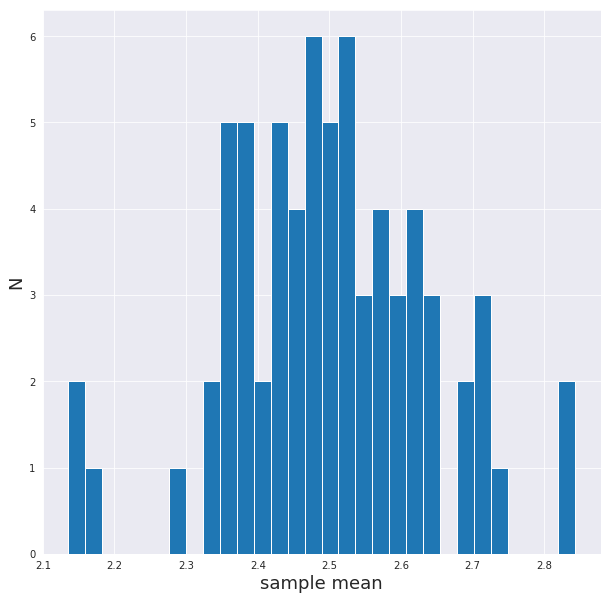

In [65]:
md3['binomial'] = {} 


for n in mysize3:
   md3['binomial'][n] = np.random.binomial(n = 5, p = .5,  size = n)
    
# save the means for plotting later    

md3['binomial']['means'] = {}
axbi_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md3['binomial']:
    if not type(nn) == str:
        md3['binomial']['means'][nn] = md3['binomial'][nn].mean()
        #and plot it
        axbi_mu_n.plot(nn, md3['binomial']['means'][nn], 'o')
        axbi_mu_n.set_xlabel('sample size', fontsize=18)
        axbi_mu_n.set_ylabel('sample mean', fontsize=18)
        axbi_mu_n.set_title('binomial', fontsize=18)
        axbi_mu_n.plot([min(mysize3), max(mysize3)], [2.5, 2.5], 'k')
axbi_mu_n.text(axbi_mu_n.get_xlim()[1] * .6, 2.5, "expected mean", 
                  va="bottom", fontsize=20)

allmeans = list(md3['binomial']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

Still converges to the mean for very large numbers we're looking good so far.

Last let's do an exponential distribution

exponential mean: 59.03, standard deviation: 55.19


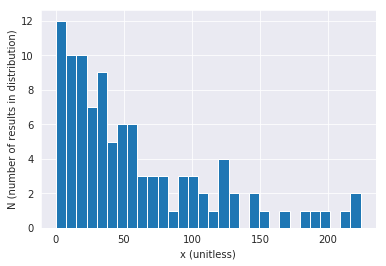

In [62]:
distributions4 = ['exp']
np.random.seed(200)
md4 = {}
# md4 is an empty disctionary; 
#so this time according to wikipedia the mean is 1/the interval but that's gonna be the parameter i set in the formula so let's just call it 50 = b or 1/gamma
md4['exp'] = np.random.exponential (scale = 50, size=100)
# md4 now is a dictionary with one object: an array by the key 'gaus'
pl.hist(md4['exp'], bins = 30)
pl.ylabel('N (number of results in distribution)')
pl.xlabel('x (unitless)');
print ("exponential mean: %.2f, standard deviation: %.2f"%(md4['exp'].mean(), md4['exp'].std()))

shape of the 'size' list that contains the size of each distribution (99,)


Text(0, 0.5, 'size of the array')

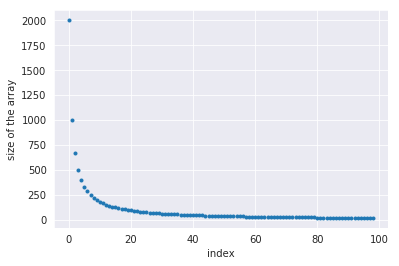

In [64]:

mysize4 = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize4 = 1000 / (np.array(range(1, 100) + [10]))
# mysize4 = (np.random.rand(100) * 1000).astype(int)
print ("shape of the 'size' list that contains the size of each distribution", mysize4.shape)
#example plot hows the array of my size
pl.plot(mysize4, '.')
pl.xlabel("index")
pl.ylabel("size of the array")

Text(0, 0.5, 'N')

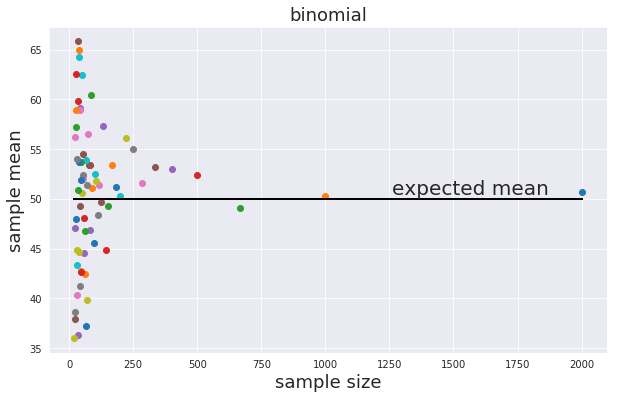

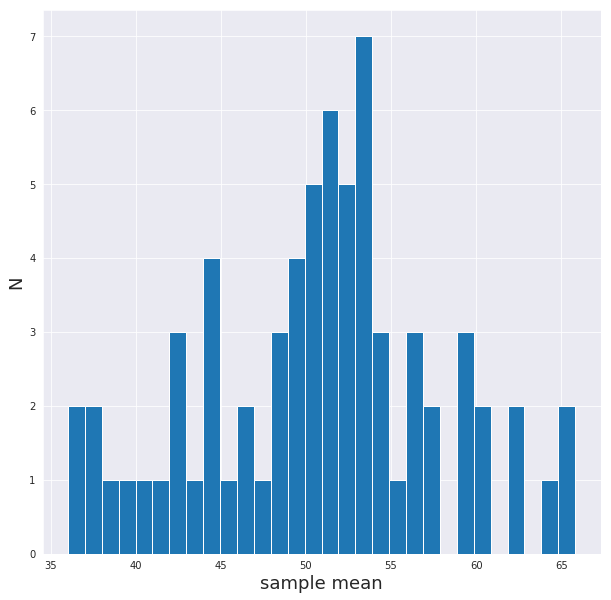

In [67]:
md4['exp'] = {} 


for n in mysize4:
   md4['exp'][n] = np.random.exponential(scale = 50.0, size = n)
    
# save the means for plotting later    

md4['exp']['means'] = {}
axexp_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md4['exp']:
    if not type(nn) == str:
        md4['exp']['means'][nn] = md4['exp'][nn].mean()
        #and plot it
        axexp_mu_n.plot(nn, md4['exp']['means'][nn], 'o')
        axexp_mu_n.set_xlabel('sample size', fontsize=18)
        axexp_mu_n.set_ylabel('sample mean', fontsize=18)
        axexp_mu_n.set_title('binomial', fontsize=18)
        axexp_mu_n.plot([min(mysize4), max(mysize4)], [50, 50], 'k')
axexp_mu_n.text(axexp_mu_n.get_xlim()[1] * .6, 50, "expected mean", 
                  va="bottom", fontsize=20)

allmeans = list(md4['exp']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

done and done large number law still holding up